## Open Information Extraction
Open information extraction (open IE) refers to the extraction of relation tuples, typically binary relations, from plain text, such as (Mark Zuckerberg; founded; Facebook). The central difference from other information extraction is that the schema for these relations does not need to be specified in advance; typically the relation name is just the text linking two arguments.
- StanfordOpenIE (https://nlp.stanford.edu/software/openie.html) StanfordOpenIE is part of StanfordCoreNLP, which is built on top of PyTorch 1.0.0. 
 - Therefore, first install pytorch (https://pytorch.org/get-started/locally/), select your  os, package, language, cuda , then use the   command to install.
 - Install StanfordOpenIE using ``pip install stanford-openie``(https://pypi.org/project/stanford-openie/)
 - Install Java SE Development Kit 8 (https://www.oracle.com/technetwork/java/javase/downloads/jdk8-downloads-2133151.html/)
 - Install graphviz : conda install python-graphviz
 - Unzip the stanford-corenlp-full-2018-10-05.zip to "C:\Users\UIC\stanfordnlp_resources"

In [2]:
import nltk
from nltk import pos_tag, word_tokenize, ne_chunk, Tree
from openie import StanfordOpenIE
from graphviz import Digraph

### Triple Extraction from text using ``StanfordOpenIE``

data type: triple is a python dict with three elememts as follows:
- {'subject':value1, 'relation':value2, 'object':value3}

In [3]:
# Example code for using StanfordOpenIE in python
from openie import StanfordOpenIE

with StanfordOpenIE() as client:
    text = 'Barack Obama was the 44th president of the United States'
    print('Text: %s.' % text)
    for triple in client.annotate(text):
        print(type(triple))
        print('|-', triple)

100% [......................................................................] 504773765 / 504773765
Extracting to C:\Users\56492\.stanfordnlp_resources.
Unzip C:\Users\56492\.stanfordnlp_resources/stanford-corenlp-4.1.0.zip.
Text: Barack Obama was the 44th president of the United States.
Starting server with command: java -Xmx8G -cp C:\Users\56492\.stanfordnlp_resources\stanford-corenlp-4.1.0/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-6b13c8c5b1e2432e.props -preload openie
<class 'dict'>
|- {'subject': 'Barack Obama', 'relation': 'was 44th president of', 'object': 'United States'}
<class 'dict'>
|- {'subject': 'Barack Obama', 'relation': 'was president of', 'object': 'United States'}
<class 'dict'>
|- {'subject': 'Barack Obama', 'relation': 'was', 'object': 'president'}
<class 'dict'>
|- {'subject': 'Barack Obama', 'relation': 'was', 'object': '44th president'}


In [4]:
#you can also do it without with statement as the following 
client =  StanfordOpenIE()
text = 'Barack Obama was the 44th president of the United States'
#print('Text: %s.' % text)
for triple in client.annotate(text):
    print(type(triple))
    print('|-', triple)

Starting server with command: java -Xmx8G -cp C:\Users\56492\.stanfordnlp_resources\stanford-corenlp-4.1.0/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-775bbc3074d94436.props -preload openie
<class 'dict'>
|- {'subject': 'Barack Obama', 'relation': 'was 44th president of', 'object': 'United States'}
<class 'dict'>
|- {'subject': 'Barack Obama', 'relation': 'was president of', 'object': 'United States'}
<class 'dict'>
|- {'subject': 'Barack Obama', 'relation': 'was', 'object': 'president'}
<class 'dict'>
|- {'subject': 'Barack Obama', 'relation': 'was', 'object': '44th president'}


For each sentence, StanfordOpenIE will return several triples with high confidence scores. 

In [5]:
def extract_triple(text):
    triples = []
    client =  StanfordOpenIE()
    for triple in client.annotate(text):
        triples.append([triple['subject'], triple['relation'],  triple['object']])    
    return triples


triples = extract_triple(""" Barack Obama was the 44th president of the United States, and the first African American to serve in the office.
          On October 3, 1992,  Barack Obama married  Michelle Robinson at Trinity United Church in Chicago. """)

print("Extracted Triples:")
for t in triples:
    print(t)

Starting server with command: java -Xmx8G -cp C:\Users\56492\.stanfordnlp_resources\stanford-corenlp-4.1.0/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-20f4349079b84805.props -preload openie
Extracted Triples:
['Barack Obama', 'was 44th president of', 'United States']
['Barack Obama', 'was president of', 'United States']
['Barack Obama', 'was', 'president']
['Barack Obama', 'was', '44th president']
['Trinity United Church', 'is in', 'Chicago']
['Barack Obama', 'married', 'Michelle Robinson']
['Barack Obama', 'married Michelle Robinson at', 'Trinity United Church']
['Barack Obama', 'married Michelle Robinson at', 'Trinity United Church in Chicago']
['Barack Obama', 'married Michelle Robinson On', 'October 3 1992']


In [6]:
# retrieve named entities and relations from triples
ent = []
rel = []
for t in triples:
    ent.append(t[0])
    ent.append(t[2])
    rel.append(t[1])

print(ent)
print(rel)

['Barack Obama', 'United States', 'Barack Obama', 'United States', 'Barack Obama', 'president', 'Barack Obama', '44th president', 'Trinity United Church', 'Chicago', 'Barack Obama', 'Michelle Robinson', 'Barack Obama', 'Trinity United Church', 'Barack Obama', 'Trinity United Church in Chicago', 'Barack Obama', 'October 3 1992']
['was 44th president of', 'was president of', 'was', 'was', 'is in', 'married', 'married Michelle Robinson at', 'married Michelle Robinson at', 'married Michelle Robinson On']


In [7]:
# find unique entities and relations 
unent = set(ent)
unrel = set(rel)
print(unent)
print(unrel)

{'44th president', 'president', 'Barack Obama', 'Michelle Robinson', 'United States', 'Trinity United Church in Chicago', 'Trinity United Church', 'Chicago', 'October 3 1992'}
{'was', 'is in', 'was president of', 'married Michelle Robinson at', 'married', 'was 44th president of', 'married Michelle Robinson On'}


To further refine the results, we can perform filtering by some constraints:

- The subjet and object must be named entity from some predfined types
- The relation must be verb or verb phrases (chunk rule)

Come up with your own refinement strategy to get a better result.

In [23]:
def extract_triple(text):
    # your implementation
    entity = []
    chunks = ne_chunk(pos_tag(word_tokenize(text)))
    print(chunks)
    for i in chunks:
        if type(i) == Tree:
            tokens = []
            for token,pos in i.leaves():
                tokens.append(token)
            new_tok = ' '.join(tokens)
            entity.append(new_tok)
    
    # obtain chunks using ne_chunk()
    # store all tokens of named entities(chunks) in a python list
    triples = []
    client =  StanfordOpenIE()
    for triple in client.annotate(text):
        if triple['subject'] in entity and triple['object'] in entity:
            triples.append([triple['subject'], triple['relation'],  triple['object']])  
    # in order to get the right triple this time,
    # you have to if the triple['subject'] and triple['object'] in 
    # the above named entities list or not        
    return triples           


triples = extract_triple(""" Barack Obama was the 44th president of the United States, and the first African American to serve in the office.
          On October 3, 1992,  Barack Obama married  Michelle Robinson at Trinity United Church in Chicago. """)

print("Extracted Triples:")
for t in triples:
    print(t)

(S
  (PERSON Barack/NNP)
  (PERSON Obama/NNP)
  was/VBD
  the/DT
  44th/JJ
  president/NN
  of/IN
  the/DT
  (GPE United/NNP States/NNPS)
  ,/,
  and/CC
  the/DT
  first/JJ
  (ORGANIZATION African/JJ American/NNP)
  to/TO
  serve/VB
  in/IN
  the/DT
  office/NN
  ./.
  On/IN
  October/NNP
  3/CD
  ,/,
  1992/CD
  ,/,
  (PERSON Barack/NNP Obama/NNP)
  married/VBD
  (PERSON Michelle/NNP Robinson/NNP)
  at/IN
  (ORGANIZATION Trinity/NNP United/NNP Church/NNP)
  in/IN
  (GPE Chicago/NNP)
  ./.)
Starting server with command: java -Xmx8G -cp C:\Users\56492\.stanfordnlp_resources\stanford-corenlp-4.1.0/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-392fc1bba8ed4dcc.props -preload openie
Extracted Triples:
['Barack Obama', 'was 44th president of', 'United States']
['Barack Obama', 'was president of', 'United States']
['Trinity United Church', 'is in', 'Chicago']
['Barack Obama', 'married'

### Construct the KB from Triples
Given the knowledge triples, we need to index all the entities and relations, i.e.,get the entity set and relation set, and represent each triple using entity id and relation id.

In [24]:
# zip function
a = (1, 2, 3)
b = ("Jenny", "Christy", "Monica")

z = zip(a, b)
print(z)
for i in z:
    print(i)
    
d = dict(zip(a,b))
print(d)

(1, 'Jenny')
(2, 'Christy')
(3, 'Monica')
{1: 'Jenny', 2: 'Christy', 3: 'Monica'}


In [25]:
#input: 
ent = ['Barack Obama', 'United States', 
       'Barack Obama', 'United States', 
       'Trinity United Church', 'Chicago', 
       'Barack Obama', 'Michelle Robinson', 
       'Barack Obama', 'Trinity United Church']

# create a dictionary using zip function for input named entities:
# {0: 'Michelle Robinson', 1: 'United States', 2: 'Chicago', 3: 'Trinity United Church', 4: 'Barack Obama'}

# you should find out all unique named entities, but our input named entities above are not unique
# thus, you have to remove duplicate named entities
unent = set(ent)
print(unent)
#output: {'Michelle Robinson', 'United States', 'Chicago', 'Trinity United Church', 'Barack Obama'}

#create a dictionary for this unique named entities
ind = range(len(unent))
print(ind)
id_en = zip(ind, unent)
for i in id_en:
    print(i)
    
id_en_dic = dict(zip(ind, unent))
print(id_en_dic)
#output: {0: 'Michelle Robinson', 1: 'United States', 2: 'Chicago', 3: 'Trinity United Church', 4: 'Barack Obama'}

{'Barack Obama', 'Michelle Robinson', 'United States', 'Trinity United Church', 'Chicago'}
range(0, 5)
(0, 'Barack Obama')
(1, 'Michelle Robinson')
(2, 'United States')
(3, 'Trinity United Church')
(4, 'Chicago')
{0: 'Barack Obama', 1: 'Michelle Robinson', 2: 'United States', 3: 'Trinity United Church', 4: 'Chicago'}


In [55]:
def KB(triples):
    
    # store named entities (subject and object) of triples to one list
    # store relation of triples to another list
    # refer to the above sample code
    ent = []
    rel = []
    for i in triples:
        ent.append(i[2])
        ent.append(i[0])
        rel.append(i[1])
    unent = set(ent)
    ind = range(len(unent))
    id_en = dict(zip(ind, unent))
#     print(id_en)

    # create two dictionaries using zip function
    # one for named entities:
    # {0: 'Michelle Robinson', 1: 'United States', 2: 'Chicago', 3: 'Trinity United Church', 4: 'Barack Obama'}  
    # refer to the above sample code
    
    unrel = set(rel)
    id_re = dict(zip(ind, unrel))
#     print(id_re)
    # another one for relation:
    # {0: 'married', 1: 'married Michelle Robinson at', 2: 'was 44th president of', 
    # 3: 'was president of', 4: 'is in'} 
     
    triples_id = []
    for i in triples:
        idx = []
        idx.append(list(id_en.keys())[list(id_en.values()).index(i[0])])
        idx.append(list(id_re.keys())[list(id_re.values()).index(i[1])])
        idx.append(list(id_en.keys())[list(id_en.values()).index(i[2])])
        triples_id.append(idx)
    # create a 2d list for triples from
    # [{'subject':'Barack Obama', 'relation':'was 44th president of', 'object':'United States'}, 
    # {'subject':'Barack Obama', 'relation':'was president of', 'object':'United States'},
    # {'subject':'Trinity United Church', 'relation':'is in', 'object':'Chicago'},
    # {'subject':'Barack Obama', 'relation':'married', 'object':'Michelle Robinson'},
    # {'subject':'Barack Obama', 'relation':'married Michelle Robinson at', 'object':'Trinity United Church'}]
    # to 
    # [[4, 2, 1], [4, 3, 1], [3, 4, 2], [4, 0, 0], [4, 1, 3]]
    

        
    #return three newly created dictionaries for entities, relations and triples
    return id_en,id_re,triples_id

#
kb = KB(triples)
print("Entities:", kb[0], "\nRelations:",kb[1], "\nTriples:",kb[2])


Entities: {0: 'Barack Obama', 1: 'Michelle Robinson', 2: 'United States', 3: 'Trinity United Church', 4: 'Chicago'} 
Relations: {0: 'is in', 1: 'was president of', 2: 'married', 3: 'married Michelle Robinson at', 4: 'was 44th president of'} 
Triples: [[0, 4, 2], [0, 1, 2], [3, 0, 4], [0, 2, 1], [0, 3, 3]]


### Visualize the KB using ``graphviz``
- To render the graph, the dependency is a working installation of ``Graphviz`` (https://www.graphviz.org/download/).
- After installing Graphviz, make sure that its ``bin/`` subdirectory containing the layout commands for rendering graph descriptions (dot, circo, neato, etc.) is on your systems’ path: On the command-line, ``dot -V`` should print the version of your Graphiz installation. 
- for Windows OS, you need to add Graphviz installation path (for example C:\Program Files\Graphviz\bin) to enviromnet variable path.
- Refer to https://graphviz.readthedocs.io/en/stable/manual.html for the user guide of graphviz

In [94]:
# input:kb_input is the knowledge graph info we obtained in the above step, which is kb
def visualizeKB(kb_input):
    dot = Digraph(comment='KB-Demo')    
    print(dot)
    
    #kb_input[0] is entity dict
    #kb_input[1] is the relation dict
    #kb_input[2] is the triple dict
    for i in range(len(kb_input[0])):
        dot.node(str(list(kb[0].keys())[i]), kb[0][i])
    for i in range(len(kb_input[0])):
        dot.edge(str(kb_input[2][i][0]), str(kb_input[2][i][2]), kb_input[1][kb_input[2][i][1]])
    # please read graphviz doc on how to create a graph based on the kb info we have
    # before you start do this, please frist go through 
    #  https://graphviz.readthedocs.io/en/stable/manual.html
 
    return dot

dot = visualizeKB(kb)
print(dot.source)

// KB-Demo
digraph {
}
// KB-Demo
digraph {
	0 [label="Barack Obama"]
	1 [label="Michelle Robinson"]
	2 [label="United States"]
	3 [label="Trinity United Church"]
	4 [label=Chicago]
	0 -> 2 [label="was 44th president of"]
	0 -> 2 [label="was president of"]
	3 -> 4 [label="is in"]
	0 -> 1 [label=married]
	0 -> 3 [label="married Michelle Robinson at"]
}


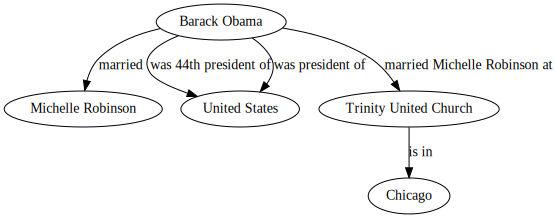

In [95]:
dot.render('kb-demo', view=True) 
dot